## Download any dataset on covid and submit the EDA on telegram if you want to have a feedback.

- Download the data from google datasearch
- Read in python
- Run EDA analysis
- Do data wrangling
- Data Visualization
- Machine learning model of your choice
- Upload the final file on your own google drive and share the link with others in comments section. 

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 1. Download and Read the Data:

In [2]:
df = pd.read_csv('covid.csv')

### 2. Run EDA (Exploratory Data Analysis):

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


In [4]:
df.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


In [5]:
df.columns

Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')

In [6]:
df.shape

(270, 7)

### 3.Data Wrangling

In [7]:
df.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

### 4. Data Visualization:

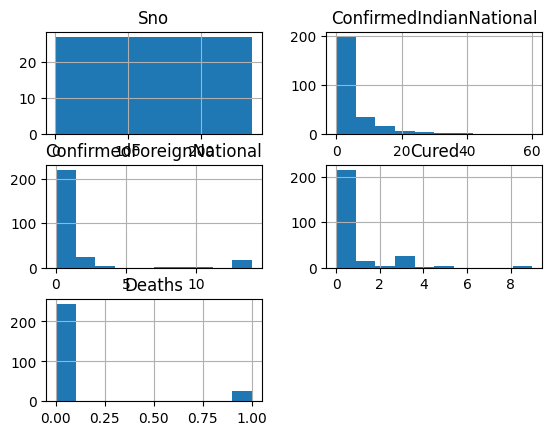

In [8]:
df.hist()
plt.show()

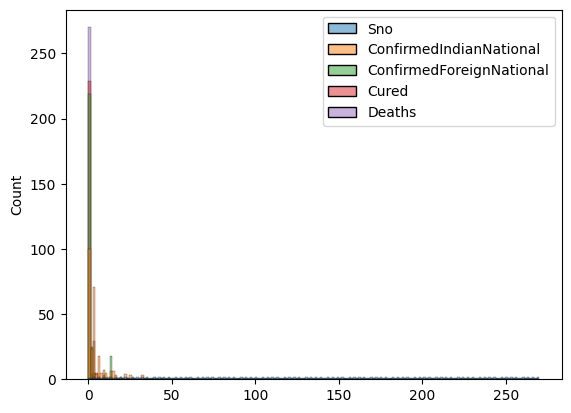

In [9]:
sns.histplot(df)
plt.show()

- #### Removing Outliers

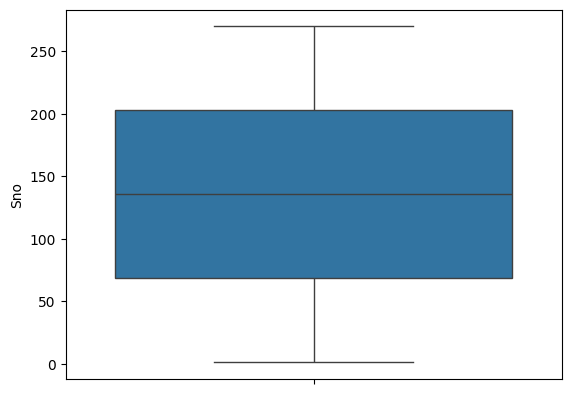

In [11]:
sns.boxplot(data = df, y = 'Sno')
plt.show()

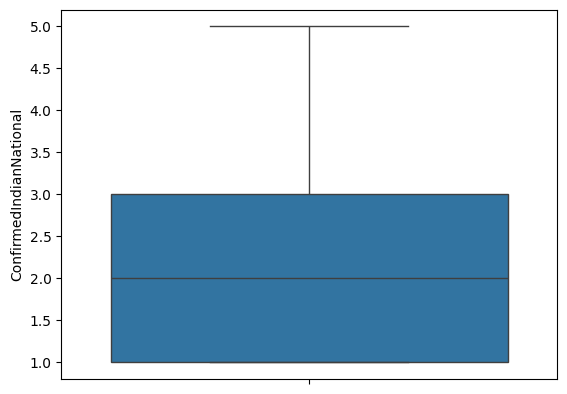

In [14]:
sns.boxplot(data = df, y = 'ConfirmedIndianNational')
plt.show()

In [13]:
df = df[(df['ConfirmedIndianNational'] > 0)& (df['ConfirmedIndianNational'] < 6)]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


In [16]:

X = df[['Sno']]
y = df['ConfirmedIndianNational'].shift(-1).fillna(0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
MAE = mean_absolute_error(y_pred, y_test)
MSE = mean_squared_error(y_pred, y_test)
MAPE = mean_absolute_percentage_error(y_pred, y_test)
R2 = r2_score(y_pred, y_test)

In [20]:
print(f'MAE:', MAE)
print(f'MSE:', MSE)
print(f'MAPE:', MAPE)
print(f'R2:', R2)

MAE: 0.9228705267207331
MSE: 1.1502605287332692
MAPE: 0.47212583416326076
R2: -126.19752709612114


In [21]:
import joblib 
joblib.dump(model, 'assinment.joblib')

['assinment.joblib']

In [22]:
model = joblib.load('assinment.joblib')

In [23]:
model

LinearRegression()